Task 1

In [95]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

In [166]:
image_path = "COMP9517_20T2_Lab2_Image.jpg"
img = cv2.imread(image_path)
shape = img.shape

a)\
read image, default value

In [168]:
out1 = np.zeros(shape, np.uint8)
sift = cv2.xfeatures2d.SIFT_create()
keypoints1, description1 = sift.detectAndCompute(img,None)
cv2.drawKeypoints(img,keypoints1,out1)

cv2.imwrite('q1a.jpg',out1)
print("Number of points: "+str(len(keypoints1)))

Number of points: 5258


b)

In order to make the number of point in new image is around 10% of the default parameter. I first get the total point SIFT function found in previous part. Then I divided the number I got by 10, and set nfeatures to be n//10. Thus, the new keypoints is approximately equal to 10% of the default method

In [169]:
out2 = np.zeros(shape, np.uint8)
sift = cv2.xfeatures2d.SIFT_create(number_of_point//10)
keypoints2, description2 = sift.detectAndCompute(img,None)
cv2.drawKeypoints(img,keypoints2,out2)

cv2.imwrite('q1b.jpg',out2)

True

a)Unchanged(100%)              | b)Changed(10%)
:-----------------------------:|:---------------------------:
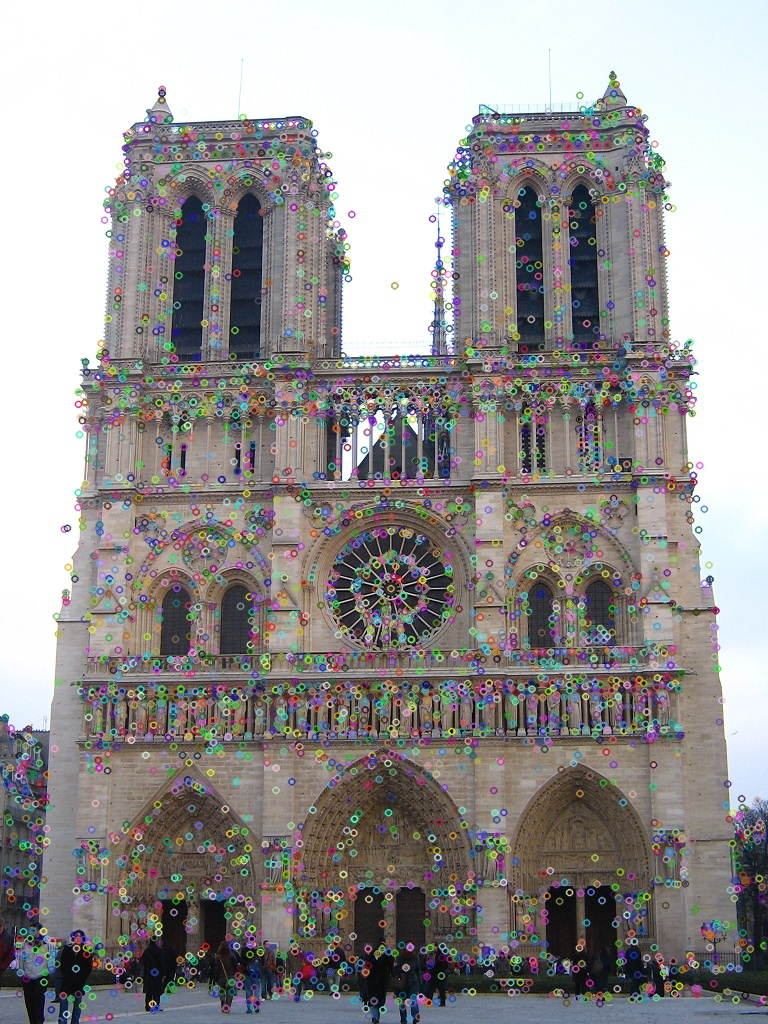|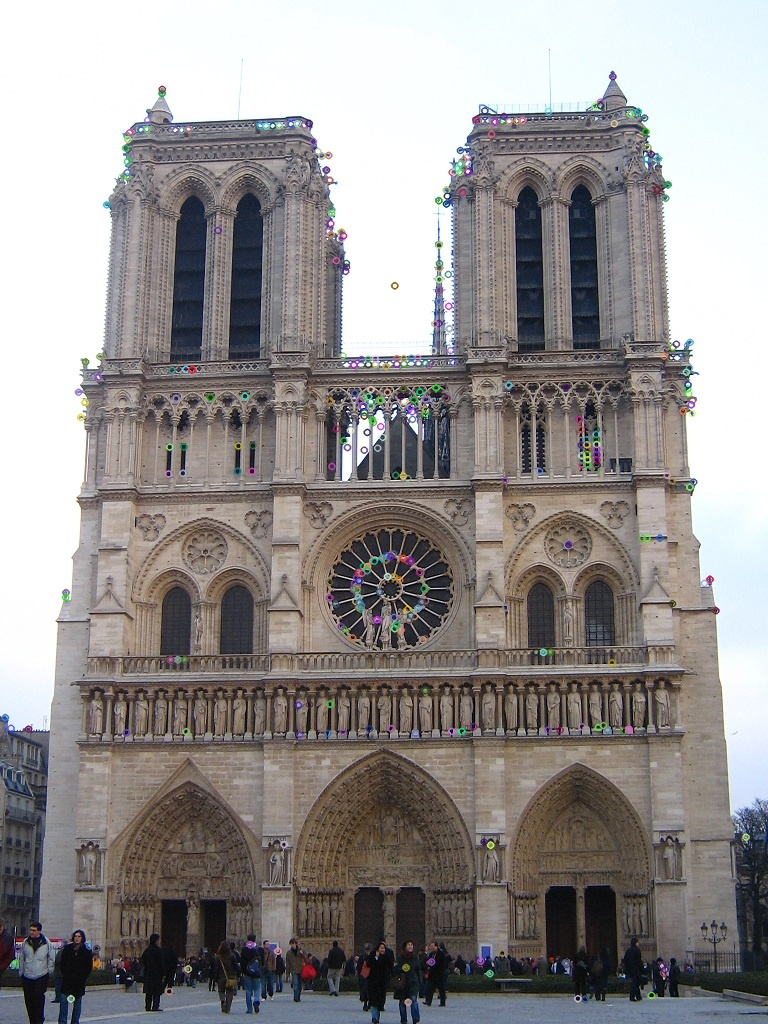

Task 2\
a)

In [173]:
height = int(shape[0]*1.15)
width = int(shape[1]*1.15)
scaled_size = (width,height)
scaled = cv2.resize(img,scaled_size)
print("unchanged size: " + str(shape) + "changed size: " + str(scaled.shape))

unchanged size: (1024, 768, 3)changed size: (1177, 883, 3)


b)

In [174]:
sift = cv2.xfeatures2d.SIFT_create(number_of_point//10)
keypoints3, description3 = sift.detectAndCompute(scaled,None)
cv2.drawKeypoints(scaled,keypoints3,out3)
cv2.imwrite('q2a.jpg',out3)

True

b)Enlarged(10%)              |
:-----------------------------:|
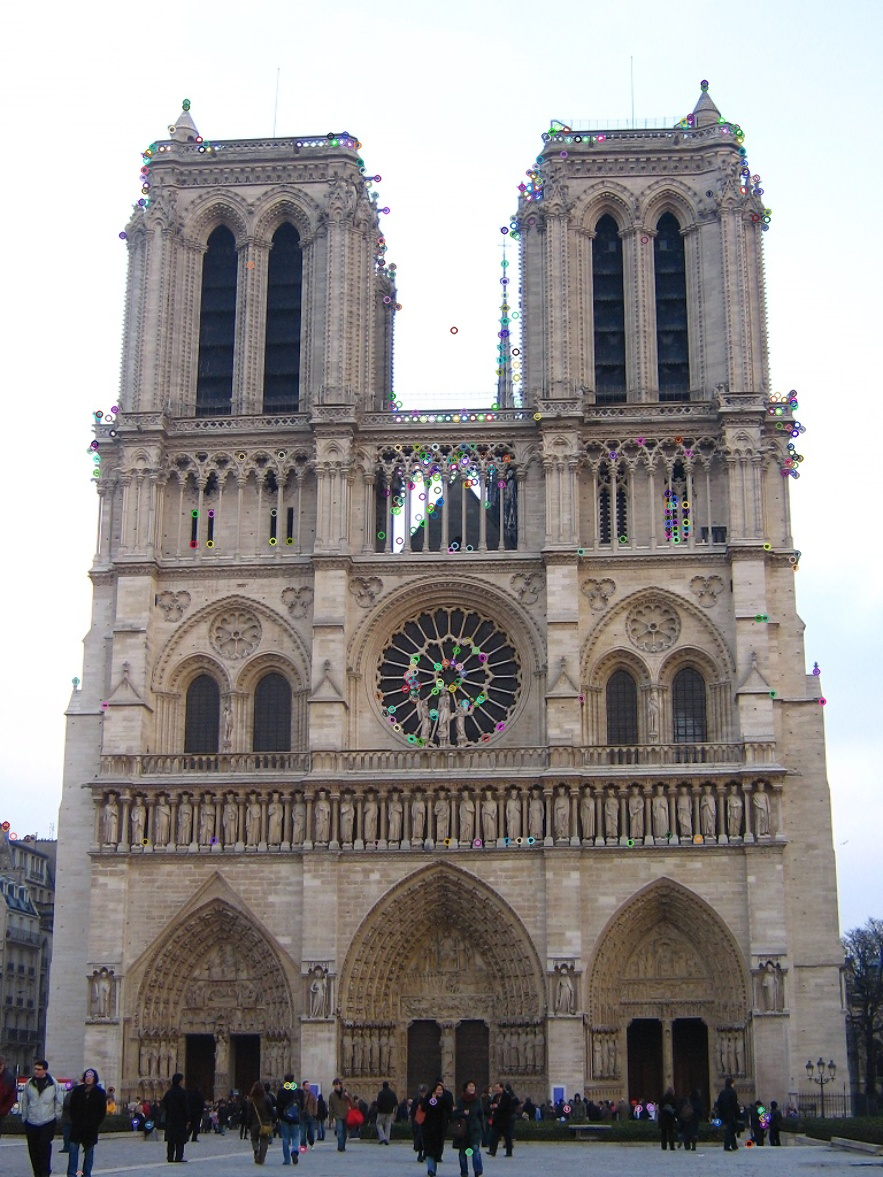|

c)\
As we see from above image, the keypoints we get after the image has been scaled is still roughly same as the image we got in q1 b). But some of part become inapproriate and cannot fit the building as accurate as the keypoints in q1 d) can. Refer to the central areas of this building, there are two circle that come with some statute. In particular, the q2 b) image,the top left part of the circle has no keypoints lay on there. Comparing to the image in q1 b), the same circle has been well fitted and these keypoints has successfully formed a circle in image in q1.\
One possible reason for this is happend because the total number of points is still same as the number in q1 part b, but the image has been scaled. Thus, in order to make the image more accurate, the number of points should be added. Otherwise there won't have enough keypoints to descripe the image's feature.

d)

In [179]:
bf = cv2.BFMatcher()
matches = bf.match(description2,description3)
matches = sorted(matches, key = lambda x:x.distance)
out4 = cv2.drawMatches(out2,keypoints2,out3,keypoints3,matches[:6], flags=2,outImg=None)
cv2.imwrite("q2d.jpg",out4)

True

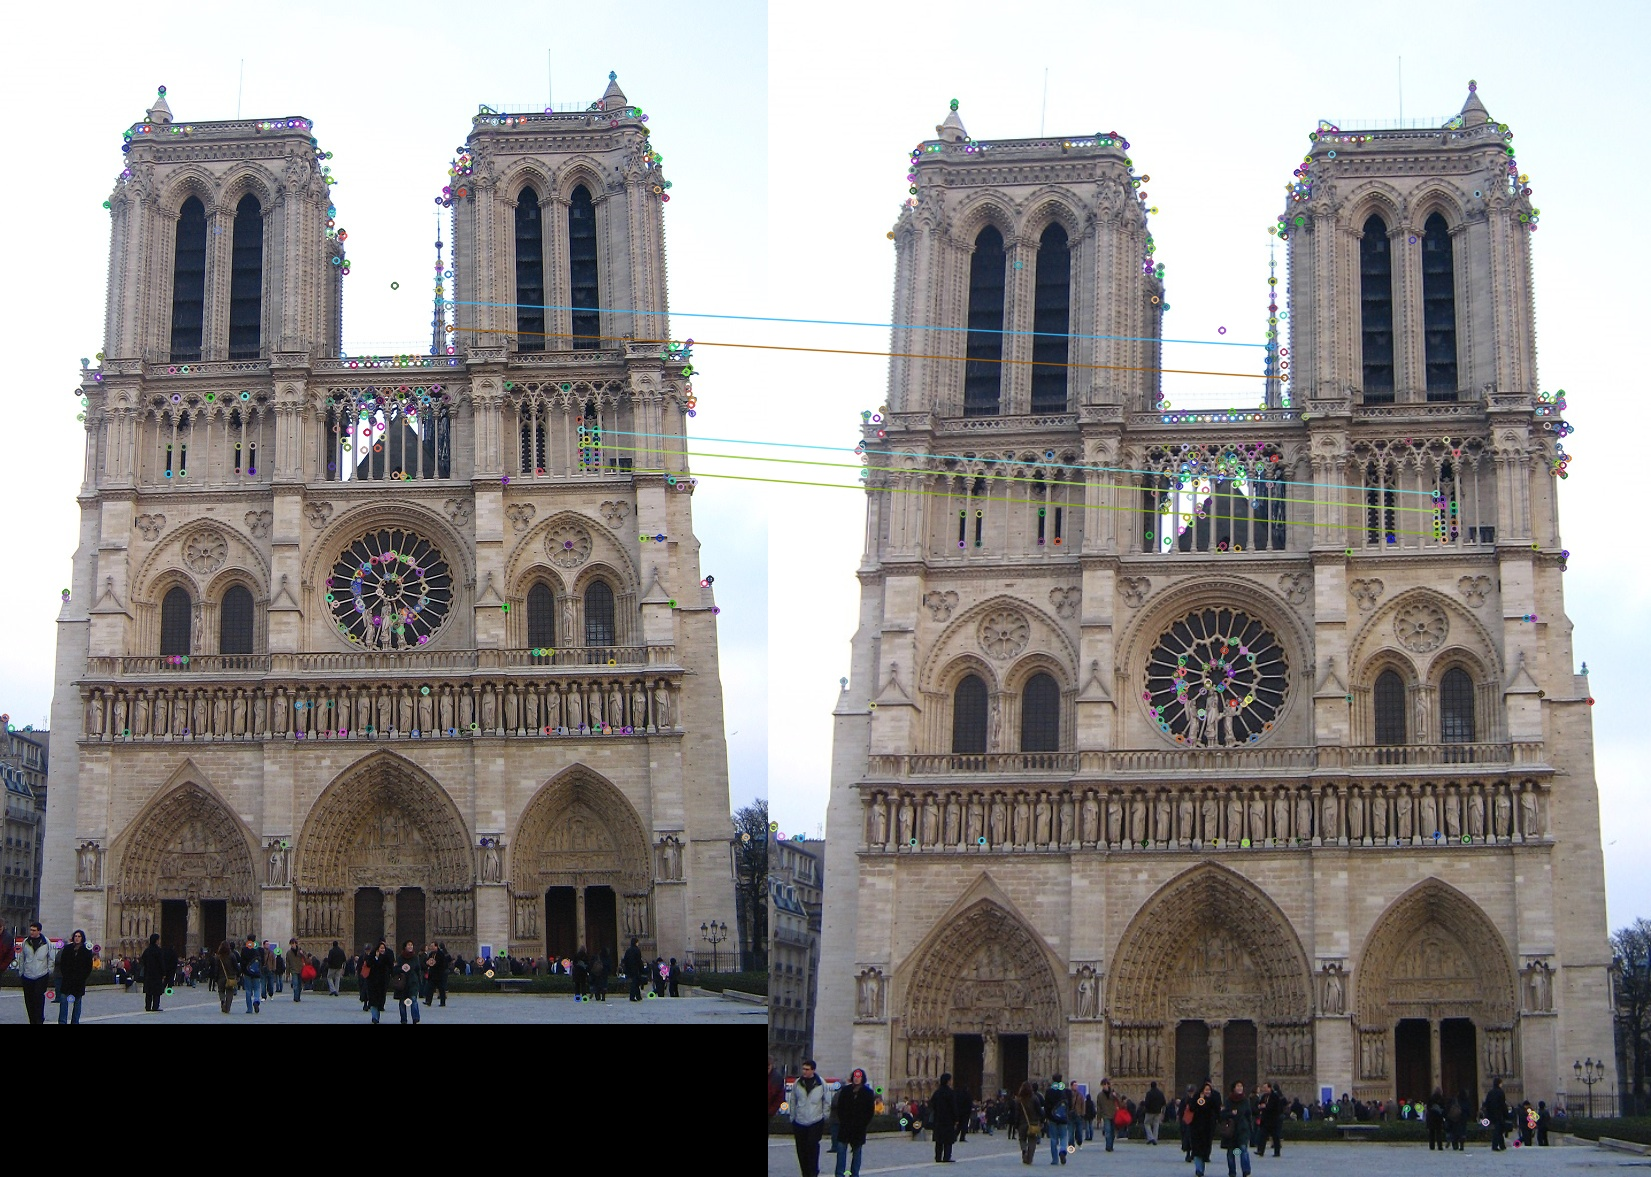

Task3\
a)

In [197]:
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]
    return cv2.warpAffine(image, rot_matrix, (w, h))

In [199]:
out4 = rotate(img,0，0，60)

SyntaxError: invalid character in identifier (<ipython-input-199-c5446432a5b6>, line 1)